In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sklearn.preprocessing as skl_pre
import sklearn.neighbors as skl_nb
import sklearn.model_selection as skl_ms
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from IPython.core.pylabtools import figsize


In [2]:
import sys

sys.path.append('../src')

from data_preprocessing import df, X_scaled,  y

X_scaled.head()



       summertime          temp           dew      humidity        precip  \
count  1600.00000  1.600000e+03  1.600000e+03  1.600000e+03  1.600000e+03   
mean      0.64375 -6.883383e-17 -8.881784e-18 -5.329071e-17 -1.332268e-17   
std       0.47904  1.000313e+00  1.000313e+00  1.000313e+00  1.000313e+00   
min       0.00000 -2.624768e+00 -2.608989e+00 -2.520668e+00 -1.326092e-01   
25%       0.00000 -8.108835e-01 -8.530852e-01 -8.432055e-01 -1.326092e-01   
50%       1.00000  3.127737e-02  5.479718e-02  6.538701e-02 -1.326092e-01   
75%       1.00000  8.626413e-01  9.028192e-01  8.402859e-01 -1.326092e-01   
max       1.00000  2.201461e+00  1.651074e+00  1.885456e+00  2.797851e+01   

          windspeed    cloudcover    visibility     month_sin     month_cos  \
count  1.600000e+03  1.600000e+03  1.600000e+03  1.600000e+03  1.600000e+03   
mean   5.107026e-17  1.332268e-16  7.904788e-16  2.553513e-17  3.108624e-17   
std    1.000313e+00  1.000313e+00  1.000313e+00  1.000313e+00  1.0003

,summertime,temp,dew,humidity,precip,windspeed,cloudcover,visibility,month_sin,month_cos,hour_of_day_sin,hour_of_day_cos,day_0,day_1,day_2,day_3,day_4,day_5,day_6,snow_or_not
0,0,-2.419627,-2.269781,-0.537283,-0.132609,0.414935,-0.999503,0.282338,0.678434,1.227255,1.371739,0.367380,False,False,False,False,False,True,False,0
1,0,-1.782607,-2.050293,-1.203654,-0.132609,1.395045,0.652979,0.282338,0.678434,1.227255,-1.013450,0.996355,False,False,False,False,True,False,False,0
2,1,1.262128,1.401656,0.496090,-0.132609,-1.687144,0.512472,0.282338,-1.259495,-0.699517,-1.013450,0.996355,False,False,False,True,False,False,False,0
3,0,-1.307542,-1.172340,-0.219564,-0.132609,0.788924,-1.964724,0.282338,0.678434,1.227255,0.363639,1.359495,False,False,False,False,False,False,True,0
4,0,-0.379006,-1.910618,-2.370721,-0.132609,-0.333044,-0.602419,0.282338,1.387764,0.005730,-1.382440,-0.358899,True,False,False,False,False,False,False,0


In [ ]:
#pd.plotting.scatter_matrix(X_scaled.iloc[:, 1:21], figsize=(10,10))
#plt.show()

kNN

*Cross validation*
rekommenderas för kNN

In [4]:
X_scaled[:10]

,summertime,temp,dew,humidity,precip,windspeed,cloudcover,visibility,month_sin,month_cos,hour_of_day_sin,hour_of_day_cos,day_0,day_1,day_2,day_3,day_4,day_5,day_6,snow_or_not
0,0,-2.419627,-2.269781,-0.537283,-0.132609,0.414935,-0.999503,0.282338,0.678434,1.227255,1.371739,0.367380,False,False,False,False,False,True,False,0
1,0,-1.782607,-2.050293,-1.203654,-0.132609,1.395045,0.652979,0.282338,0.678434,1.227255,-1.013450,0.996355,False,False,False,False,True,False,False,0
2,1,1.262128,1.401656,0.496090,-0.132609,-1.687144,0.512472,0.282338,-1.259495,-0.699517,-1.013450,0.996355,False,False,False,True,False,False,False,0
3,0,-1.307542,-1.172340,-0.219564,-0.132609,0.788924,-1.964724,0.282338,0.678434,1.227255,0.363639,1.359495,False,False,False,False,False,False,True,0
4,0,-0.379006,-1.910618,-2.370721,-0.132609,-0.333044,-0.602419,0.282338,1.387764,0.005730,-1.382440,-0.358899,True,False,False,False,False,False,False,0
5,1,1.283722,0.503750,-1.203130,-0.132609,0.066738,0.518581,0.282338,1.387764,0.005730,-1.382440,-0.358899,False,False,False,True,False,False,False,0
6,1,1.694005,1.651074,0.198294,-0.132609,0.930783,-0.428313,0.282338,-0.740228,-1.215794,-1.240015,0.705772,False,False,False,False,True,False,False,0
7,0,-1.113198,-0.942876,-0.076957,-0.132609,1.085537,1.089771,0.282338,-0.030897,1.416225,-0.005351,1.407303,False,True,False,False,False,False,False,0
8,0,0.150044,0.603517,1.029292,-0.132609,0.647066,0.750722,0.282338,-0.740228,1.227255,-1.431019,0.004240,True,False,False,False,False,False,False,0
9,0,-2.128109,-1.990432,-0.460737,-0.132609,-0.088017,-1.219427,0.282338,0.678434,1.227255,1.371739,-0.358899,False,False,False,False,False,True,False,0


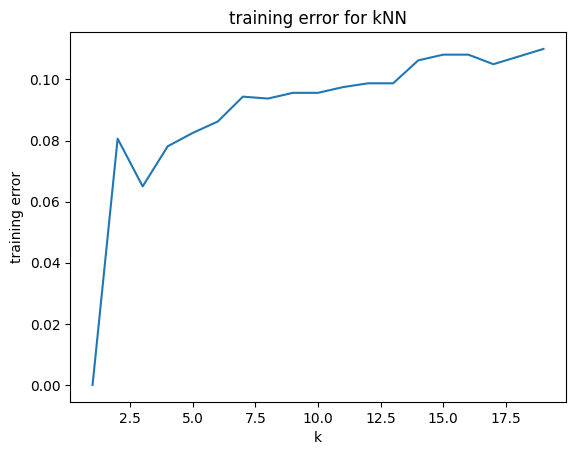

In [5]:
#from excercise 6.1 a)
np.random.seed(1)


misclassification = []

K = np.arange(1,20)
for k in K:
    model = skl_nb.KNeighborsClassifier(n_neighbors=k)
    model.fit(X_scaled, y)
    prediction = model.predict(X_scaled)
    misclassification.append(np.mean(prediction != y))

plt.plot(K, misclassification)
plt.title('training error for kNN')
plt.xlabel('k')
plt.ylabel('training error')

plt.show()
    

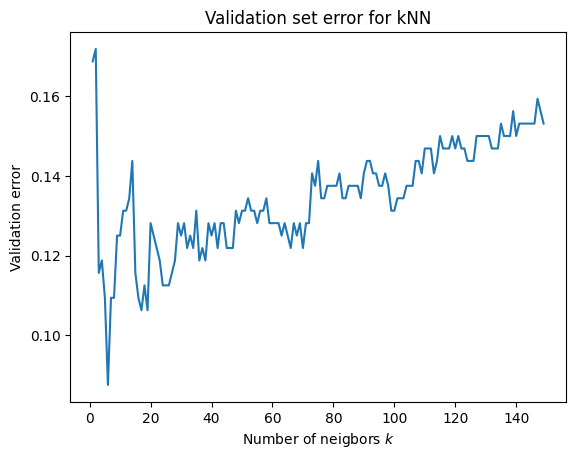

In [6]:
#from excercise 6.1 b)
np.random.seed(1)

N = len(X_scaled)
M = np.ceil(0.8*N).astype(int)

idx = np.random.permutation(N)
X_train, X_val = X_scaled.iloc[idx[:M]], X_scaled.iloc[idx[M:]]
y_train, y_val = y.iloc[idx[:M]],  y.iloc[idx[M:]]

misclassification = []

K = np.arange(1,150)
for k in K:
    model = skl_nb.KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    prediction = model.predict(X_val)
    misclassification.append(np.mean(prediction != y_val))

plt.plot(K, misclassification)
plt.title('Validation set error for kNN')
plt.xlabel('Number of neigbors $k$')
plt.ylabel('Validation error')
plt.show()

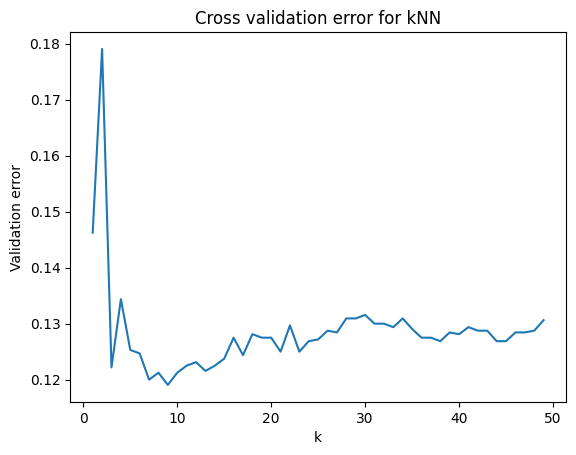

In [7]:
n_runs = 10
K = np.arange(1,50)

misclassification = np.zeros((n_runs, len(K)))
for i in range(n_runs):
    X_train, X_val, y_train, y_val = skl_ms.train_test_split(X_scaled, y, test_size=0.2)

    for j, k in enumerate(K):
        model = skl_nb.KNeighborsClassifier(n_neighbors=k)
        model.fit(X_train, y_train)
        prediction = model.predict(X_val)
        misclassification[i, j] = (np.mean(prediction != y_val))

avarage_mis = np.mean(misclassification, axis=0)

plt.plot(K, avarage_mis)
plt.title('Cross validation error for kNN')
plt.xlabel('k')
plt.ylabel('Validation error')
plt.show()

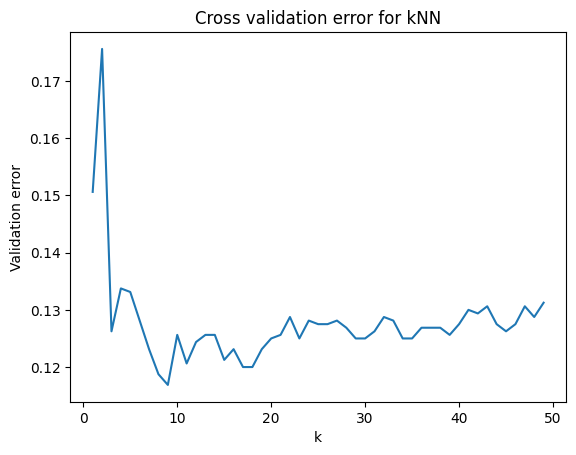

Average Succesrate for 19: 0.87500
Average Succesrate for 20: 0.87438
Average Succesrate for 21: 0.87125
Average Succesrate for 22: 0.87500
Average Succesrate for 23: 0.87187
Average Succesrate for 24: 0.87250
Average Succesrate for 25: 0.87250
Average Succesrate for 26: 0.87187
Average Succesrate for 27: 0.87312
Average Succesrate for 28: 0.87500
Average Succesrate for 29: 0.87500


In [92]:
n_fold = 10

X = df.drop("increase_stock", axis=1)
y = df["increase_stock"]

day_cols = [c for c in X.columns if c.startswith("day_")]
binary_cols = ["snow_or_not", "summertime"]
cols_to_scale = [c for c in X.columns if c not in day_cols + binary_cols]

preprocessor = ColumnTransformer(
    transformers=[("scale", StandardScaler(), cols_to_scale)],
    remainder="passthrough",
)

cv = skl_ms.StratifiedKFold(n_splits=n_fold, random_state=1, shuffle=True)
K = np.arange(1, 50)
misclassification = np.zeros(len(K))

for j, k in enumerate(K):
    pipeline = Pipeline([
        ("preprocess", preprocessor),
        ("model", skl_nb.KNeighborsClassifier(n_neighbors=k)),
    ])
    scores = skl_ms.cross_val_score(pipeline, X, y, cv=cv)
    misclassification[j] = 1 - np.mean(scores)

plt.plot(K, misclassification)
plt.title('Cross validation error for kNN')
plt.xlabel('k')
plt.ylabel('Validation error')
plt.show()

for k_index in range(19,30):
    print(f"Average Succesrate for {k_index}: {1 - misclassification[k_index]:.5f}")

k=2: high=0.75347, low=0.83994
k=3: high=0.58681, low=0.93674
k=4: high=0.69097, low=0.90473
k=5: high=0.53819, low=0.93902
k=6: high=0.66319, low=0.91768
k=7: high=0.55903, low=0.94665
k=8: high=0.64583, low=0.93293
k=9: high=0.56944, low=0.95198


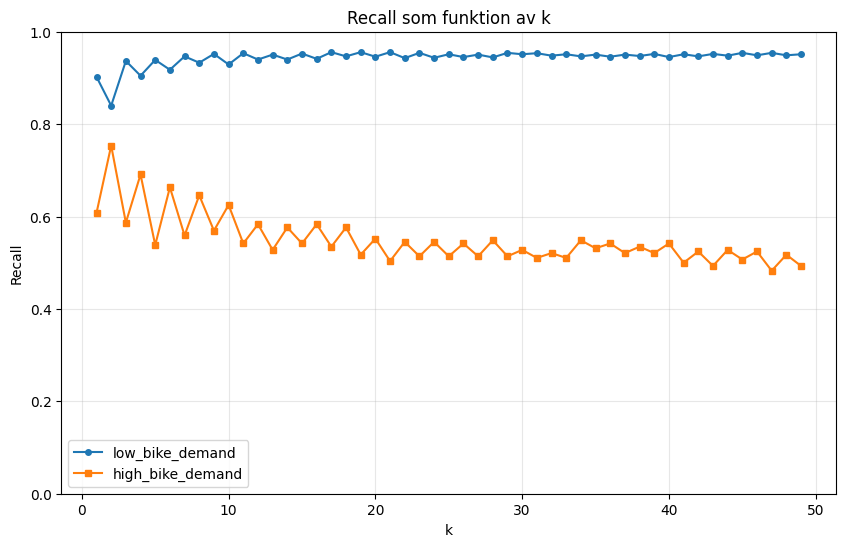

In [88]:
from sklearn.metrics import classification_report

K = np.arange(1, 50)
recall_low = []
recall_high = []

for k in K:
    pipeline = Pipeline([
        ("preprocess", preprocessor),
        ("model", skl_nb.KNeighborsClassifier(n_neighbors=k)),
    ])
    y_pred = cross_val_predict(pipeline, X, y, cv=cv)
    report = classification_report(y, y_pred, output_dict=True)
    
    recall_low.append(report.get("low_bike_demand", {}).get("recall", 0))
    recall_high.append(report.get("high_bike_demand", {}).get("recall", 0))

for k_value in range(2, 10):
    k_index = k_value - 1
    print(f"k={k_value}: high={recall_high[k_index]:.5f}, low={recall_low[k_index]:.5f}")

plt.figure(figsize=(10, 6))
plt.plot(K, recall_low, label="low_bike_demand", marker='o', markersize=4)
plt.plot(K, recall_high, label="high_bike_demand", marker='s', markersize=4)
plt.title("Recall som funktion av k")
plt.xlabel("k")
plt.ylabel("Recall")
plt.ylim(0, 1)
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

In [ ]:
# - Final Pipeline (Leak-free, using raw features) --------
# Using the same setup as Cell 11 for fair comparison

pipeline_final = Pipeline([
    ("preprocess", preprocessor),
    ("model", skl_nb.KNeighborsClassifier(n_neighbors=6))
])

y_pred = cross_val_predict(pipeline_final, X, y, cv=cv)

print("kNN Model  - Classification Report")

print(classification_report(y, y_pred))

# Extract recall values for comparison
report_final = classification_report(y, y_pred, output_dict=True)
recall_low_final = report_final.get("low_bike_demand", {}).get("recall", 0)
recall_high_final = report_final.get("high_bike_demand", {}).get("recall", 0)

print(f"\nRecall Summary (k=6):")
print(f"  low_bike_demand:  {recall_low_final:.5f}")
print(f"  high_bike_demand: {recall_high_final:.5f}")

Final kNN Model (k=6) - Classification Report
                  precision    recall  f1-score   support

high_bike_demand       0.65      0.62      0.64       288
 low_bike_demand       0.92      0.93      0.92      1312

        accuracy                           0.87      1600
       macro avg       0.79      0.78      0.78      1600
    weighted avg       0.87      0.87      0.87      1600


Recall Summary (k=6):
  low_bike_demand:  0.92759
  high_bike_demand: 0.62500


In [80]:
from sklearn.metrics import recall_score, make_scorer
from sklearn.model_selection import StratifiedKFold, cross_validate

def knn_variant_scores(X, y, k=4, cv_splits=10, random_state=1):
    day_cols = [c for c in X.columns if c.startswith("day_")]
    binary_cols = [c for c in X.columns if c in ["snow_or_not", "summertime"]]
    cols_to_scale = [c for c in X.columns if c not in day_cols + binary_cols]

    preprocessor = ColumnTransformer(
        transformers=[("scale", StandardScaler(), cols_to_scale)],
        remainder="passthrough",
    )

    pipeline = Pipeline([
        ("preprocess", preprocessor),
        ("model", skl_nb.KNeighborsClassifier(n_neighbors=k)),
    ])

    cv = StratifiedKFold(n_splits=cv_splits, shuffle=True, random_state=random_state)
    scores = cross_validate(
        pipeline,
        X,
        y,
        cv=cv,
        scoring={
            "recall_low": make_scorer(recall_score, pos_label="low_bike_demand"),
            "recall_high": make_scorer(recall_score, pos_label="high_bike_demand"),
        },
    )
    return scores["test_recall_low"].mean(), scores["test_recall_high"].mean()

base_df = df.copy()
variants = {"original": base_df}

if "windspeed" in base_df.columns:
    df_wind = base_df.copy()
    df_wind["windspeed_sqrt"] = np.sqrt(df_wind["windspeed"])
    variants["windspeed_sqrt"] = df_wind

for col_name, label in [("humidity", "no_humidity"), ("summertime", "no_summertime")]:
    if col_name in base_df.columns:
        df_drop = base_df.drop(columns=[col_name])
        variants[label] = df_drop

if "weekday" in base_df.columns:
    variants["no_weekday"] = base_df.drop(columns=["weekday"])

k_value = 4
for name, data in variants.items():
    X_var = data.drop("increase_stock", axis=1)
    y_var = data["increase_stock"]
    recall_low, recall_high = knn_variant_scores(X_var, y_var, k=k_value)
    print(
        f"{name}: k={k_value} | recall low={recall_low:.4f} | "
        f"recall high={recall_high:.4f}"
    )

original: k=4 | recall low=0.9047 | recall high=0.6909
windspeed_sqrt: k=4 | recall low=0.9024 | recall high=0.6701
no_humidity: k=4 | recall low=0.9032 | recall high=0.6631
no_summertime: k=4 | recall low=0.9001 | recall high=0.6978
